In [1]:
import json
import numpy as np
import dateutil
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import math
sns.set()

In [2]:
def get_samples(bp):
    with open(bp + "metadata.json") as f:
        metadata = json.load(f)

    categories = metadata['categories']
    annotations = metadata['annotations']


    return categories, annotations

In [3]:
bp = "C:/Users/Aslak/prog/uni/Cameratraps/NINA/NINA/"
categories, annotations = get_samples(bp)

In [4]:
dates = []
for anot in annotations:
    date = dateutil.parser.parse(anot['Date'])
    dates.append(date)

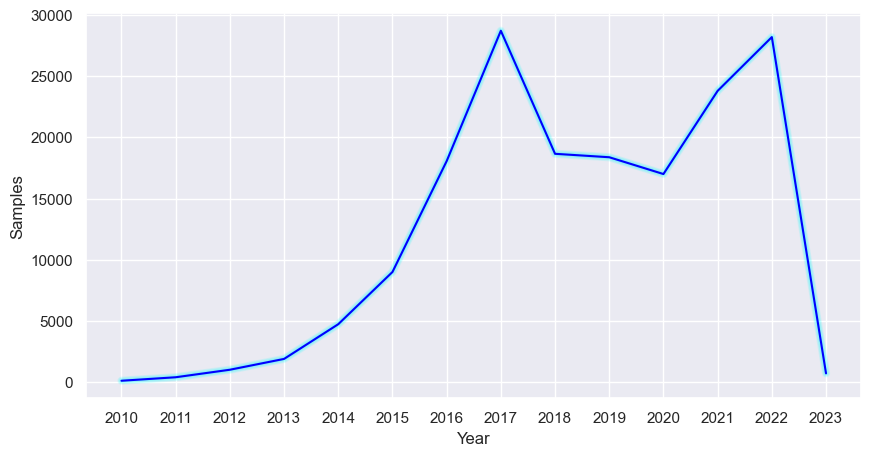

In [5]:
d = defaultdict(int)
for date in dates:
    d[date.year] += 1
od = OrderedDict(sorted(d.items()))
keys = []
values = []
for k, v in od.items():
    keys.append(k)
    values.append(v)

plt.figure(figsize=(10, 5))
for i in range(1, 7):
    plt.plot(keys, values, linewidth=i, alpha=0.1, c="cyan", antialiased=True)
plt.plot(keys, values, c="blue", antialiased=True)

plt.xticks(keys)  # Set the x-ticks to the keys (years)
plt.xlabel('Year')
plt.ylabel('Samples')

plt.savefig("../../Report_v2/images/Chapter3/Distribution_by_year.png", dpi=300)
plt.show()



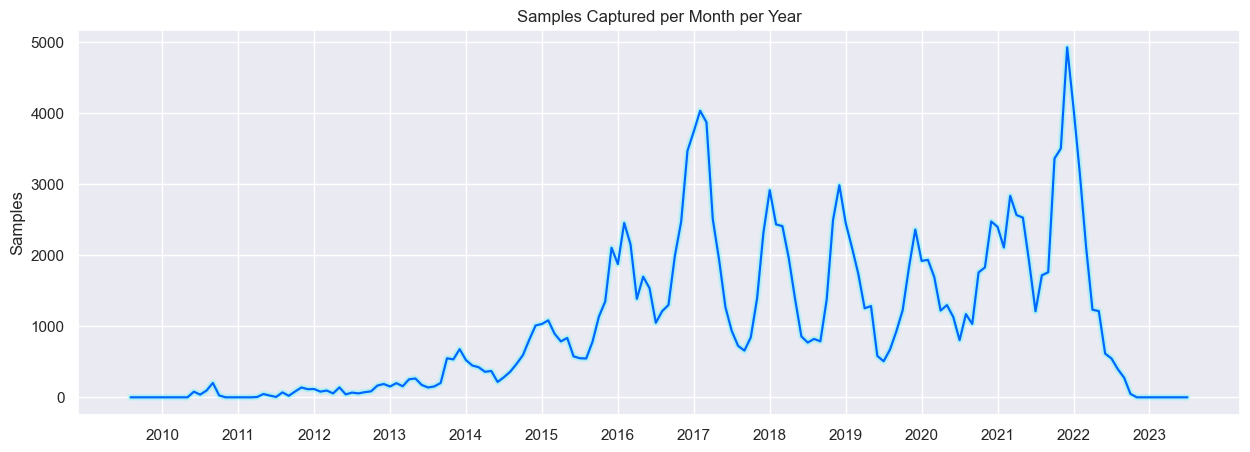

In [6]:
d = {}
for date in dates:
    if date.year not in d.keys():
        l = [0] * 12
        d[date.year] = l
    d[date.year][date.month - 1] += 1

new_d = {}
for key in sorted(d.keys()):
    new_d[key] = d[key]
d = new_d

samples_per_month = []
year_markers = []  # Store the x-coordinates where markers will be placed
x = 0  # Starting x-coordinate for the first year

for year, v in d.items():
    year_markers.append(x + 5)  # Adjust the offset (5) as needed
    for e in v:
        samples_per_month.append(e)
    x += len(v)

plt.figure(figsize=(15, 5))
x = np.arange(len(samples_per_month))
plt.plot(x, samples_per_month, c="blue")
for i in range(1, 6):
    plt.plot(x, samples_per_month, linewidth=i, alpha=0.1, c="cyan", antialiased=True)
plt.xticks(year_markers, d.keys())
plt.ylabel('Samples')
plt.title('Samples Captured per Month per Year')
plt.savefig("../../Report_v2/images/Chapter3/Distribution_by_month.png", dpi=300)


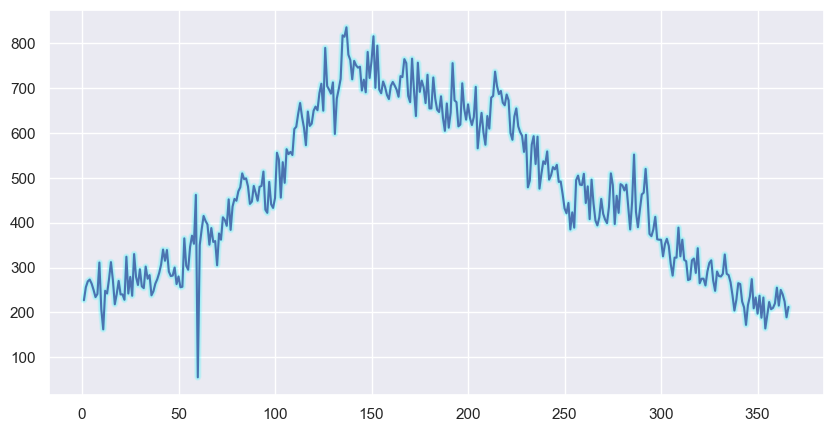

In [7]:
d = defaultdict(int)
for date in dates:
    leap_adjustment = int(date.year % 4 != 0 and date.month > 2)
    d[date.timetuple().tm_yday + leap_adjustment] += 1

new_d = {}
keys = []
for key in sorted(d.keys()):
    keys.append(key)
    new_d[key] = d[key]
d = new_d

values = list(d.values())

plt.figure(figsize=(10, 5))
# plt.xticks(keys)  # Set the x-ticks to the keys (years)
for i in range(1, 6):
    plt.plot(keys, values, linewidth=i, alpha=0.1, c="cyan", antialiased=True)

plt.plot(keys, values)
plt.savefig("../../Report_v2/images/Chapter3/Distribution_by_day_of_year.png")

In [8]:
def convert_coordinates_to_id(latitude, longitude, num_ids):
    lat_range = (-90, 90)
    lon_range = (-180, 180)

    # Normalize latitude and longitude to the range [0, 1]
    normalized_lat = (latitude - lat_range[0]) / (lat_range[1] - lat_range[0])
    normalized_lon = (longitude - lon_range[0]) / (lon_range[1] - lon_range[0])

    # Combine latitude and longitude IDs into a single ID number
    id_number = math.floor((normalized_lon + normalized_lat)*(num_ids // 2))

    return id_number

In [9]:
d = defaultdict(int)
for anot in annotations:
    d[convert_coordinates_to_id(anot['Latitude'], anot['Longitude'], 50000000000000000)] += 1


l = []
for key in d.keys():
    a = [key, d[key]]
    l.append(a)

l = np.array(l)
print(l[:, 1].min(), l[:, 1].max(), l[:, 1].mean(), np.sqrt(l[:, 1].var()))

1 3440 406.2690476190476 517.5362756957214


In [10]:
l.shape

(420, 2)

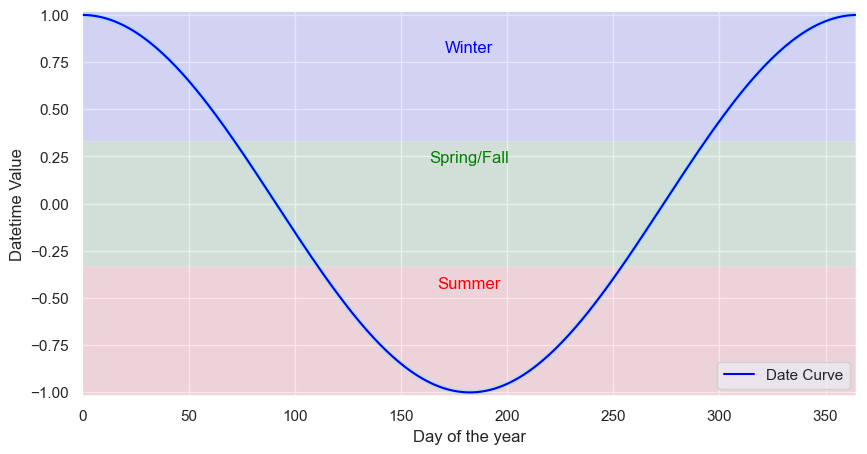

In [11]:
a = np.arange(365)
plt.figure(figsize=(10, 5))

# Plot the background color representing seasons
plt.fill_between(a, 0.33, 2, where=(a <= 366), facecolor='blue', alpha=0.1)  # Winter
plt.fill_between(a, 0.33, -0.33, where=(a <= 366), facecolor='green', alpha=0.1)  # Winter
plt.fill_between(a, -0.33, -2, where=(a <= 366), facecolor='red', alpha=0.1)  # Winter

# Plot the main line and other elements
for i in range(1, 5):
    plt.plot(a, np.cos(a/365*2*np.pi), linewidth=i, alpha=0.1, c="cyan", antialiased=True, label='_nolegend_')
plt.plot(a, np.cos(a/365*2*np.pi), c="blue", label="Date Curve")
# Add labels for seasons
plt.text(182, 0.8, 'Winter', color='blue', fontsize=12, ha="center")
plt.text(182, 0.22, 'Spring/Fall', color='green', fontsize=12, ha="center")
plt.text(182, -0.45, 'Summer', color='red', fontsize=12, ha="center")


plt.legend(loc="lower right")
plt.ylabel("Datetime Value")
plt.xlabel("Day of the year")

# Set the plot limits
plt.xlim(0, 365)
plt.ylim(-1.02, 1.02)

plt.savefig("../../Report_v2/images/Chapter3/sine_representation.png", dpi=300)
plt.show()